In [ ]:
# default_exp pipe

In [ ]:
#export
from speechsep.imports import *
from speechsep.data import *
from speechsep.core import *
from speechsep.masks import *
from speechsep.utils import *

# AudioPipe
> Basic Pipeline for Masking techniques (name should be changed later)

In [ ]:
fn = Path("../data/esc50_sample/")

In [ ]:
#export
class SiamesePiar(Transform):
    def __init__(self, items, labels):
        store_attr(self, 'items,labels')
        self.assoc = self
        sortlbl = sorted(enumerate(labels), key=itemgetter(1))
        self.clsmap = {k:L(v).itemgot(0) for k,v in itertools.groupby(sortlbl, key=itemgetter(1))}
        self.idxs = range_of(self.items)
        
    def encodes(self, i:int)->None:
        othercls=self.clsmap[self.labels[i]] if random.random()>0.5 else self.idxs
        othercls=self.idxs
        otherit = random.choice(othercls)
        return Tuple(self.items[i], self.items[otherit])

In [ ]:
#export
class Group(Transform):
    as_item_force=True
    def encodes(self, audioList):
        return Tuple(audioList[0], Tuple(audioList[1:]))
    def decodes(self, audioList):
        return Tuple(audioList[0], *Tuple(audioList[1]))

In [ ]:
#export
class NanFinder(Transform):
    as_item_force=True
    def __init__(self, spot):
        self.spot = spot
    def encodes(self, item):
        if isinstance(item, np.ndarray):
            if np.isnan(item).any():
                print(f"Nans found in {self.spot}")
        else:
            if item is None:
                print(f"None item found")

In [ ]:
#export
def AudioPipe(path, sr=22050, duration=5):
    items = get_audio_files(path)
    sp = SiamesePiar(items, items.map(parent_label))
    return Pipeline([sp, AudioMono.create, Resample(sr), Clip(duration), Mixer, Spectify(), Unet_Trimmer(8), Normalize(), Decibelify(), Group()])

In [ ]:
audiopipe = AudioPipe(fn)

In [ ]:
out = audiopipe(2)

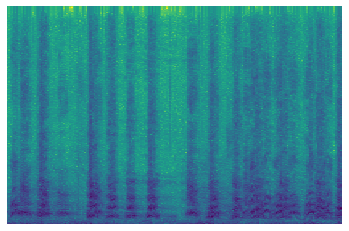

In [ ]:
out[0].show()

In [ ]:
out[1][0].show()

In [ ]:
out[1][1].show()